In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import nltk
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from  nltk.corpus import stopwords 

In [2]:
df=pd.read_csv(r'C:\\Users\\Akshay N R\\Desktop\\Data Science\\projects\\project2\\files\\code\\RESUME_DATA.csv',encoding = 'unicode_escape')
df

,Resumes,Category
0,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume
1,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
2,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
4,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS Developer Resume
...,...,...
74,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday Resume
75,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,Workday Resume
76,Vinay kumar .v\nWorkday Functional Consultant\...,Workday Resume
77,Name: Ravali P \n\n\n\n ...,internship Resume


In [3]:
import copy

In [4]:
df1=copy.deepcopy(df)

In [5]:
df1.head()

,Resumes,Category
0,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume
1,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
2,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
4,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS Developer Resume


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resumes   79 non-null     object
 1   Category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [7]:
df1.Category.unique()

array(['React JS Developer Resume', 'PeopleSoft Resume',
       'SQL Developer Lightning Insight Resume', 'Workday Resume',
       'internship Resume'], dtype=object)

In [8]:
df1.isnull().sum()

Resumes     0
Category    0
dtype: int64

In [9]:
def removed_pattern(input_txt1, pattern1):
    r1=re.findall(pattern1,input_txt1)
    for word in r1:
        input_txt1=re.sub(word,"",input_txt1)
    return input_txt1

In [10]:
def clean_text(text):
    '''make text lowercase,remove text in square brackets,remove punchuation and remove containing numbers.'''
    text=re.sub("[0-9" "]+"," ",text)
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text=re.sub('http\S+\s*', '', text)
    text=re.sub('#\S+', '', text)
    text=re.sub('\w*\d\w*','',text)
    text=re.sub('@\S+', '', text)
    text=re.sub('[''""...]','',text)
    text=re.sub('\s+', ' ', text) 
    text=text.lower()
    return text
clean=lambda x: clean_text(x)

In [11]:
df1['cleaned_resumes']=df1.Resumes.apply(clean)

In [12]:
df1

,Resumes,Category,cleaned_resumes
0,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,kanumuru deepak reddy career objective to secu...
1,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experience as ui developer i...
2,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,kamalakar reddy a linked in professional summa...
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...
4,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS Developer Resume,fullstack software developer web developer pav...
...,...,...,...
74,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday Resume,workday hcm fcm name kumar ss role workday con...
75,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,Workday Resume,venkateswarlub workday consultant professional...
76,Vinay kumar .v\nWorkday Functional Consultant\...,Workday Resume,vinay kumar v workday functional consultant ex...
77,Name: Ravali P \n\n\n\n ...,internship Resume,name ravali p curriculum vitae specialization ...


In [13]:
tokenized_review1=df1['cleaned_resumes'].apply(lambda x : x.split())
tokenized_review1.head()

0    [kanumuru, deepak, reddy, career, objective, t...
1    [haripriya, battina, experience, as, ui, devel...
2    [kamalakar, reddy, a, linked, in, professional...
3    [naveen, sadhu, title, software, developer, lo...
4    [fullstack, software, developer, web, develope...
Name: cleaned_resumes, dtype: object

In [14]:
from nltk.stem.porter import PorterStemmer
ste = PorterStemmer()

In [15]:
tokenized_review1=tokenized_review1.apply(lambda sen: [ste.stem(word) for word in sen])
tokenized_review1.head()

0    [kanumuru, deepak, reddi, career, object, to, ...
1    [haripriya, battina, experi, as, ui, develop, ...
2    [kamalakar, reddi, a, link, in, profession, su...
3    [naveen, sadhu, titl, softwar, develop, locat,...
4    [fullstack, softwar, develop, web, develop, pa...
Name: cleaned_resumes, dtype: object

In [16]:
for i in range(len(tokenized_review1)):
    tokenized_review1[i] = " ".join(tokenized_review1[i])
    
df1['cleaned_resumes']=tokenized_review1
df1.head()

,Resumes,Category,cleaned_resumes
0,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,kanumuru deepak reddi career object to secur a...
1,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume,haripriya battina experi as ui develop in reac...
2,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,kamalakar reddi a link in profession summari â...
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu titl softwar develop locat hydera...
4,FULLSTACK SOFTWARE DEVELOPER / WEB DEVELOPER\n...,React JS Developer Resume,fullstack softwar develop web develop pava gos...


In [17]:
df2=df1.drop(['Resumes'],axis=1)
df2

,Category,cleaned_resumes
0,React JS Developer Resume,kanumuru deepak reddi career object to secur a...
1,React JS Developer Resume,haripriya battina experi as ui develop in reac...
2,React JS Developer Resume,kamalakar reddi a link in profession summari â...
3,React JS Developer Resume,naveen sadhu titl softwar develop locat hydera...
4,React JS Developer Resume,fullstack softwar develop web develop pava gos...
...,...,...
74,Workday Resume,workday hcm fcm name kumar ss role workday con...
75,Workday Resume,venkateswarlub workday consult profession summ...
76,Workday Resume,vinay kumar v workday function consult experti...
77,internship Resume,name ravali p curriculum vita special be compu...


In [18]:
#word frequency
freq=pd.Series(''.join(df2['cleaned_resumes']).split()).value_counts()[:20]
freq

and           2870
the           1406
in            1308
to            1119
of            1052
for            673
on             650
experi         605
report         562
applic         531
develop        517
work           510
server         499
use            474
with           425
peoplesoft     420
workday        410
integr         407
as             407
project        384
Name: count, dtype: int64

In [19]:
#removing stopwords
from  nltk.corpus import stopwords 
stop=stopwords.words('english')
df2['cleaned_resumes']=df2['cleaned_resumes'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [20]:
#word frequency after removal of stopwords
freq_sw=pd.Series(''.join(df2['cleaned_resumes']).split()).value_counts()[:20] #for top 20
freq_sw

experi        605
report        562
applic        531
develop       517
work          510
server        499
use           474
peoplesoft    420
workday       410
integr        407
project       384
creat         374
data          331
process       304
databas       301
design        299
system        276
busi          271
test          260
respons       259
Name: count, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

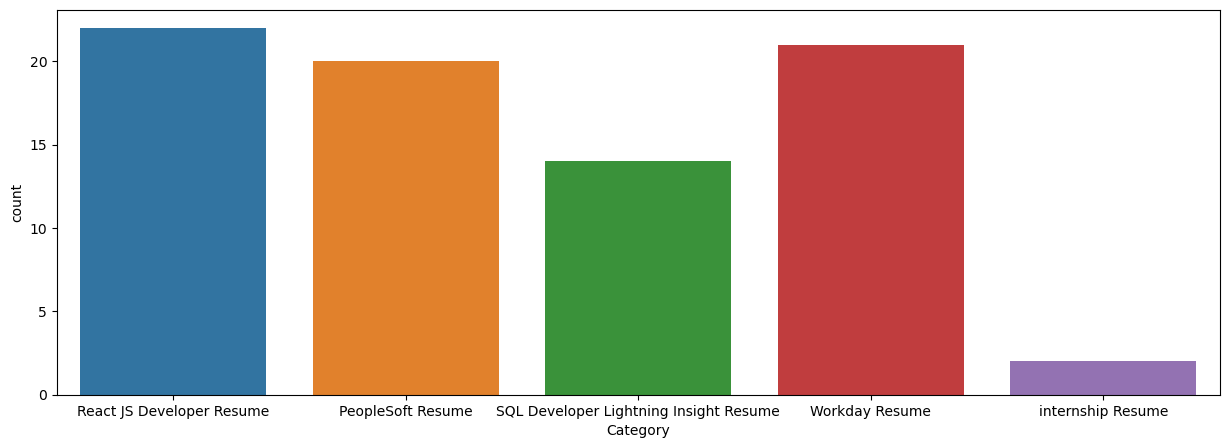

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(df2['Category'])

# N-gram

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
#bi-gram
def get_top_n2_words(corpus, n=None):
    vec1=CountVectorizer(ngram_range=(2,2), #for tri-gram, put ngram_range=(3,3)
          max_features=2000).fit(corpus)               
    bag_of_words=vec1.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0, idx]) for word, idx in
               vec1.vocabulary_.items()]
    words_freq=sorted(words_freq, key=lambda x: x[1],
            reverse=True)
    return words_freq[:n]

In [23]:
top2_words=get_top_n2_words(df2['cleaned_resumes'],n=200) #top 200
top2_df=pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram","Freq"]
top2_df.head()

,Bi-gram,Freq
0,applic server,121
1,sql server,111
2,process schedul,106
3,web server,91
4,busi process,86


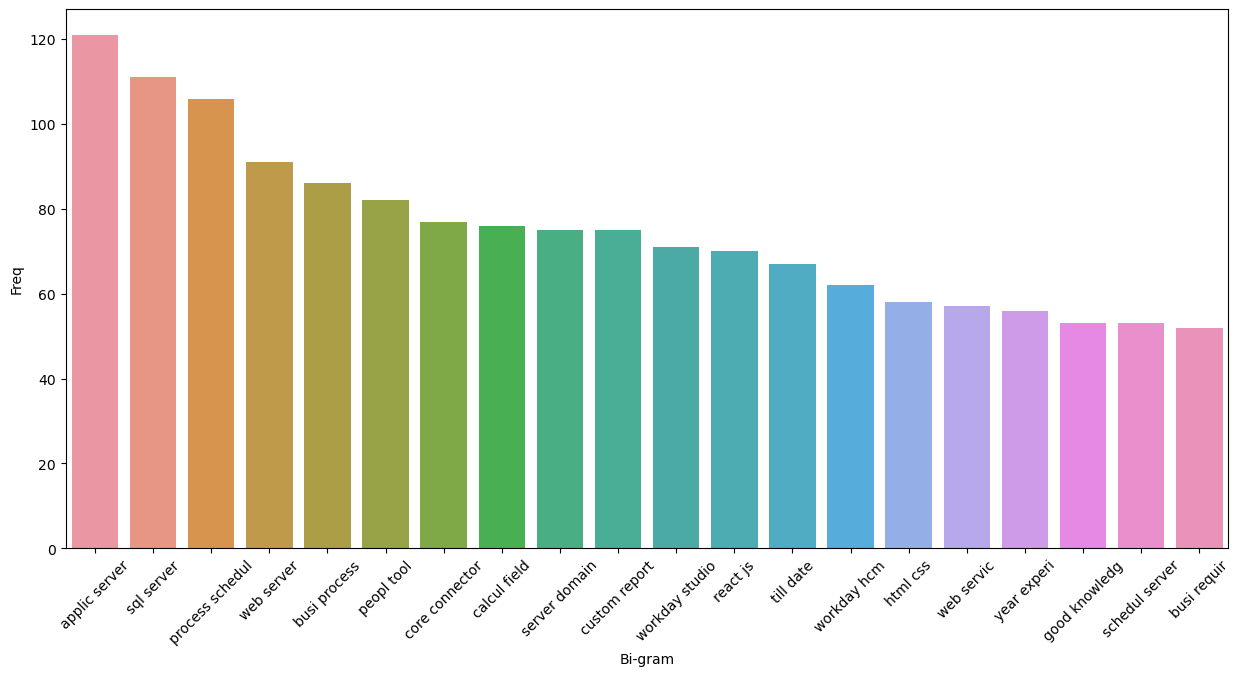

In [24]:
#Bi-gram plot
top20_bigram=top2_df.iloc[0:20,:]
fig=plt.figure(figsize=(15,7))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels=top20_bigram["Bi-gram"]);

In [25]:
#tri-gram
def get_top_n3_words(corpus, n=None):
    vec1=CountVectorizer(ngram_range=(3,3),
          max_features=2000).fit(corpus)               
    bag_of_words=vec1.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0, idx]) for word, idx in
               vec1.vocabulary_.items()]
    words_freq=sorted(words_freq, key=lambda x: x[1],
            reverse=True)
    return words_freq[:n]

In [26]:
top3_words=get_top_n3_words(df2['cleaned_resumes'],n=200) 
top3_df=pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram","Freq"]
top3_df.head()

,Tri-gram,Freq
0,process schedul server,53
1,server web server,44
2,server process schedul,38
3,applic server domain,37
4,oper system window,35


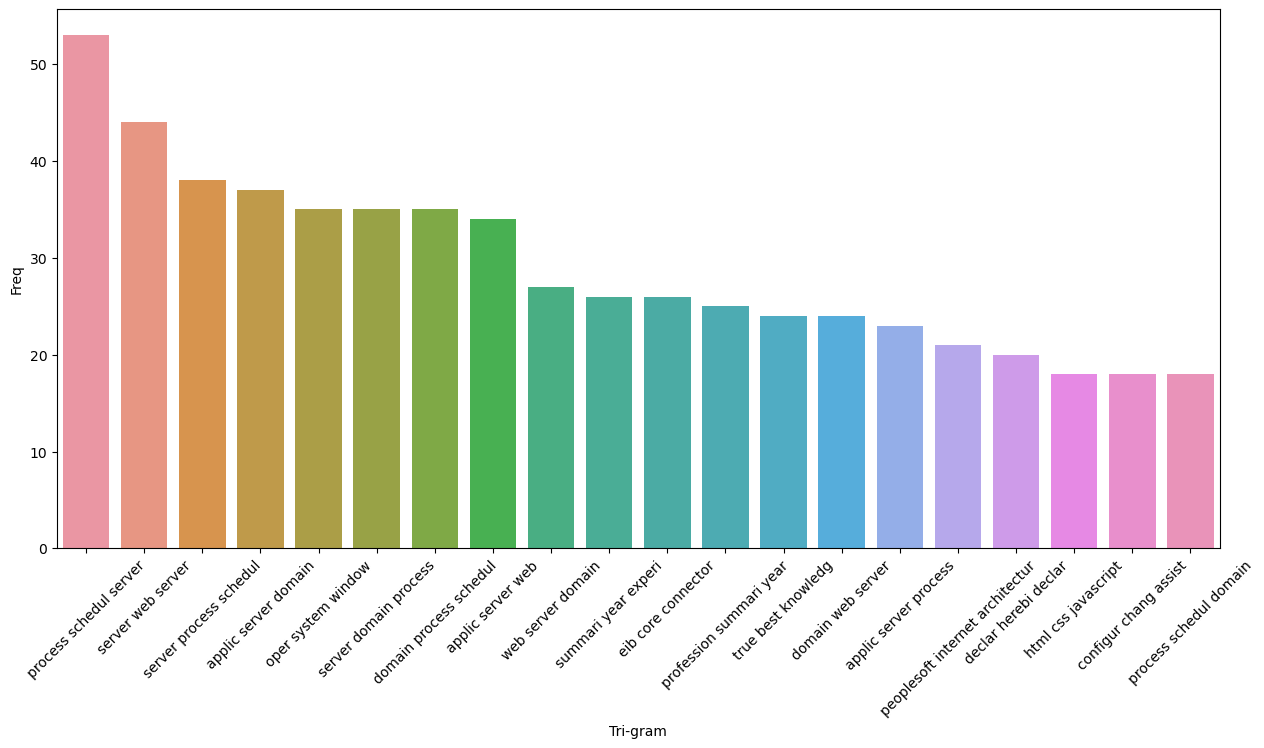

In [27]:
#tri-gram plot
top20_trigram=top3_df.iloc[0:20,:]
fig=plt.figure(figsize=(15,7))
plot1=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot1.set_xticklabels(rotation=45,labels=top20_trigram["Tri-gram"]);

# WordCloud

In [28]:
string_Total=" ".join(df2['cleaned_resumes'])

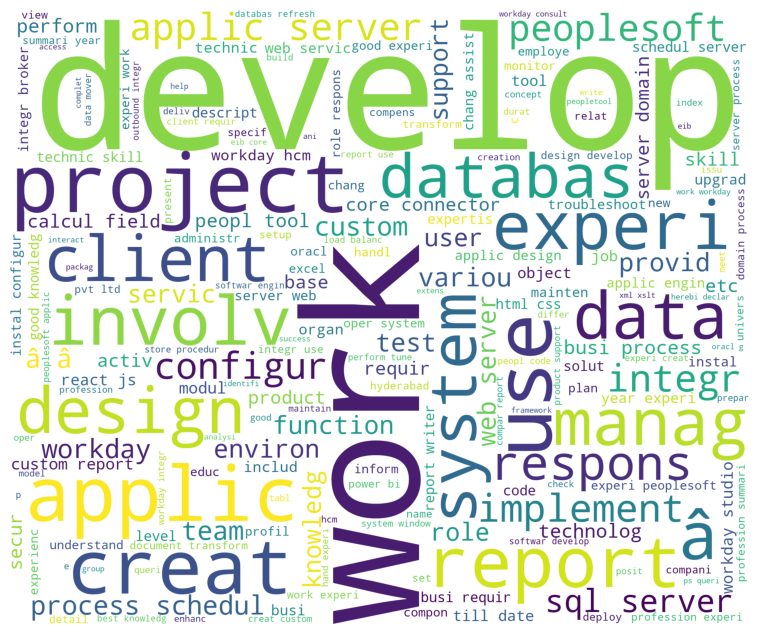

In [29]:
from wordcloud import WordCloud
wordcloud_stw=WordCloud(
              background_color='white',
              width=1800,
              height=1500
              ).generate(string_Total)
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wordcloud_stw)

In [30]:
every_words=" ".join([sen for sen in df2['cleaned_resumes']])

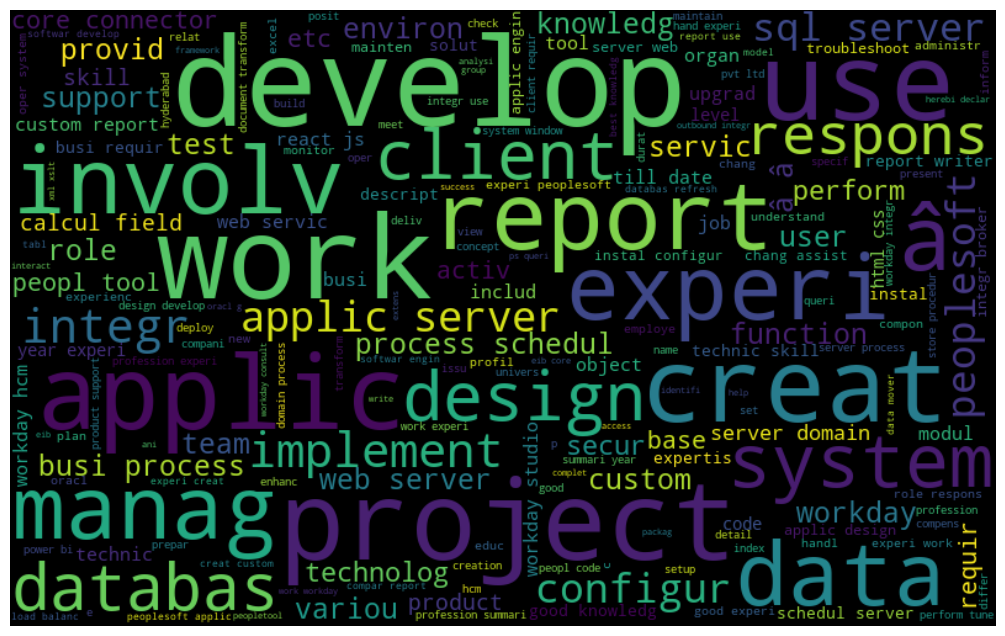

In [31]:
wc=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(every_words)

plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
df2.head()

,Category,cleaned_resumes
0,React JS Developer Resume,kanumuru deepak reddi career object secur posi...
1,React JS Developer Resume,haripriya battina experi ui develop reactj jav...
2,React JS Developer Resume,kamalakar reddi link profession summari â ye...
3,React JS Developer Resume,naveen sadhu titl softwar develop locat hydera...
4,React JS Developer Resume,fullstack softwar develop web develop pava gos...


In [33]:
#count vectoriser tells the frequency of a word
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1,max_df=0.9)
X=vectorizer.fit_transform(df2['cleaned_resumes'])
word_freq_df=pd.DataFrame({'term':vectorizer.get_feature_names(),'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency']=word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending=False).head())

In [34]:
word_freq_df.head(50)

,term,occurrences,frequency
0,aa,1,0.000026
1,ab,1,0.000026
2,abdul,2,0.000053
3,abil,45,0.001182
4,abilitiescommun,1,0.000026
5,abl,2,0.000053
6,abov,25,0.000657
7,abovement,4,0.000105
8,abreast,1,0.000026
9,absenc,32,0.000840


In [35]:
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow1 = bow_vectorizer.fit_transform(df2['cleaned_resumes'])

In [36]:
bow1[0].toarray()

array([[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 2, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 3, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [42]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df2[i] = le.fit_transform(df2[i])

In [43]:
df2

,Category,cleaned_resumes
0,1,kanumuru deepak reddi career object secur posi...
1,1,haripriya battina experi ui develop reactj jav...
2,1,kamalakar reddi link profession summari â ye...
3,1,naveen sadhu titl softwar develop locat hydera...
4,1,fullstack softwar develop web develop pava gos...
...,...,...
74,3,workday hcm fcm name kumar ss role workday con...
75,3,venkateswarlub workday consult profession summ...
76,3,vinay kumar v workday function consult experti...
77,4,name ravali p curriculum vita special comput s...
